# Math for ML: Probability

In this part of the Math for ML series I'll cover the basic theory of probability. Probability is the study of randomness. We'll discuss random variables, random number generators, probability distributions, moments, and conditional distributions.

I'll start by loading the libraries we've been working with so far. New to this lesson is the seaborn library, a plotting library that extends matplotlib by adding a bunch of nice statistical plots.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

Probability is the study of randomness. When dealing with randomness, variables in code can often take on unpredictable values, which makes it hard to exactly replicate results. While not always necessary, when you want to ensure that your code is exactly reproducible, you have to remember to set a **seed** when working with random numbers. The seed can be any number you want, but you should pick it and put it at the top of your code. Setting the seed will ensure that every time your code is run the outputs will agree with the results somebody else gets from running your code.

Since I want to make sure my code in this book is reproducible, I will from now on always set a seed. To set a seed in numpy, you just need to pass in `np.random.seed(seed)` right after import numpy, where `seed` can be any positive integer you like. Different seeds will produce random numbers in different orders. Below I'll choose a seed of zero, which is completely arbitrary.

In [2]:
np.random.seed(0)

In [3]:
# re-write notes
# introduce conditional probs before independence
# move moments to statistics lesson

# add in poisson, geometric, exponential, multivariate laplace, student-t

# constraint: can't cover conditional distributions without covering joint distributions first
# can I cover joint distributions earlier (before distributions) without making everything confusing? prob not...

# use sympy more to actually calculate more difficult things, e.g. det(Sigma) in N(mu, Sigma)
# it may be useful to adopt the Y;X notation to have a way to write "Y|X where X is a point mass"

# make it more clear that histograms are just an unnormalized approximation to the true probability function

# lead into joint distributions using an example of n dice, starting independent, then imagining some kind of gluing

# still need to talk about probabilities of sets of outcomes, both for contin and discrete cases
# maybe cover this in the section before common distributions?
# need to cover the CDF too

# it's easiest to derive the variance trick in the discrete case by expanding out the sum and working element-wise

## Randomness

Probability is a calculus for modeling random processes. There are things we just can't predict with certainty given the information we have available. Stuff that we can't predict with certainty we call **random**, or **noise**, or **non-deterministic**. Stuff we *can* predict we call **deterministic**. Here are some examples of these two kinds of processes. The questions in the deterministic column have definite answers, while those in the random column do not.

| Deterministic Process | Random Process |
|---------------|--------|
| Does $2+2=4$?        | Will it rain today? |
| What is the capital of France? | What is the result of rolling a pair of dice? |
| How many sides does a square have? | What is the next card in a shuffled deck? |
| What is the value of pi? | What is the stock price of Apple tomorrow? |
| What is the boiling point of water at sea level? | What is the winning number for next week's lottery? |

Deterministic processes aren't terribly interesting. They either occur or don't. Random processes *might* occur. To quantify what we mean by *might* we introduce **probability**, which you can think of as a function mapping questions like "Will it rain today?" to a number between $0$ and $1$ that indicates our "degree of belief" in whether that question is true,

$$0 \leq \mathbb{Pr}(\text{Will it rain today?}) \leq 1.$$

The question inside this probability function is called an **event**. An event is anything that might occur. Technically speaking it's a mathematical *set* that lives in an abstract *sample space*.

When we're *certain* an event will occur we say it has **probability one**, or a 100% chance of happening. When we're certain an event *will not* occur we say it has **probability zero**, or a 0% chance of happening. These extremes are deterministic processes. Random processes are anything in between. For the question "Will it rain today?", we might say there is a 20% chance of rain, in which case we believe $\mathbb{Pr}(\text{Will it rain today?}) = 0.2$.

A common theme we'll see in machine learning is that we're interested in mapping arbitrary data structures like the string `Will it rain today?` to numerical data structures that we can do mathematical calculations with, like floats or arrays. In this particular example, it's convenient to map the question `Will it rain today?` to a binary variable $x$,

$$
x = 
\begin{cases}
1, & \text{It will rain today} \\
0, & \text{It will not rain today}.
\end{cases}
$$

We can then model $\mathbb{Pr}(\text{Will it rain today?})$ more simply as $\mathbb{Pr}(x=1)$. Saying we believe there's a 20% chance of rain today is equivalent to saying we believe there is a 20% chance that $x=1$, i.e. $\mathbb{Pr}(x=1)=0.2$.

Variables like $x$ are called **random variables**. They're a way of encoding random processes numerically via some kind of encoding convention. It's much more convenient to work with random variables than events or questions since we can now use all our usual mathematical tools like calculus and linear algebra to understand random processes.

Random variables are most useful to think of in practice as the outputs of **random number generators**. These are algorithms that generate, or **sample**, random numbers. Unlike regular functions, where a given input will *always* produce a definite output, a random number generator can (and usually will) produce different outputs every single time the same input is passed in.

The canonical example of a random number generator is called **rand**. It's an algorithm for generating (pseudo) random real numbers between $0$ and $1$. Every time we call rand we'll get a different number with no clear pattern. Here's an example. I'll call rand via the numpy function `np.random.rand` a bunch of times. Notice how unrelated the outputs look. There's no clear pattern, other than being between $0$ and $1$.

In [4]:
x = np.arange(10)
y = []
for i in x:
    r = np.random.rand()
    y.append(r)
y

[0.5488135039273248,
 0.7151893663724195,
 0.6027633760716439,
 0.5448831829968969,
 0.4236547993389047,
 0.6458941130666561,
 0.4375872112626925,
 0.8917730007820798,
 0.9636627605010293,
 0.3834415188257777]

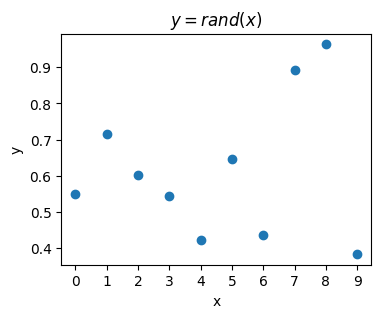

In [5]:
plt.scatter(x, y)
plt.xticks(x)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = rand(x)$')
plt.show();

Think of a random variable informally as being some variable $y$ whose values are determined by a random number generator like rand, $y=\text{rand}(x)$. On one sampling we might get $y=0.548$. On another, $y=0.715$. On another $y=0.603$. Etc. We can't force $y$ to take on a definite value. It jumps around with no clear pattern.

Since random variable outputs jump around like this we need a different way to visualize them than just thinking of them as points on the number line. The most useful way to visualize random variables is using a **histogram**. To create a histogram, we sample a random variable a whole bunch of times, and plot a count of how many times the variable takes on each given value. We then show these counts in a bar chart with the heights indicating the counts for each value.

In matplotlib we can plot histograms of an array of samples `x` using the function `plt.hist(x)`. Here's an example. I'll sample 100 values from rand and put them in an array `x`, then plot the histogram. Note how I'm samping 100 values at one time, not looping through rand a bunch of times like I did above. This is doing the same thing, but it's much more efficient, vectorized code.

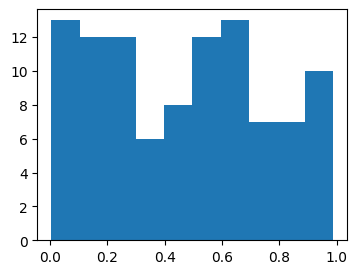

In [6]:
x = np.random.rand(100)
plt.hist(x)
plt.show()

Notice that we just sampled $100$ different values, but we don't see $100$ different bars. That's because histograms don't plot bars for *all values*. First, the values get *binned* into some number of equally spaced **bins**, then the counts that get plotted are the counts of values inside each bin. In this case, the histogram divides the samples into $10$ equally spaced bins. If you look carefully you should see $10$ bars in the plot. We can change the number of bins by passing in a keyword `bins` specifying how many bints to take.

Since I'll be using histograms a lot in this lesson I'm going to write a helper function `plot_histogram` to bundle up the code to plot them nicely. Instead of using `plt.hist`, however, I'll use the seaborn library's `sns.histplot`, which creates much nicer looking histograms. Seaborn is an extension library of matplotlib made specifically for making nicer plots of data. Ignore the `is_discrete` argument for now. I'll use it below.

In [7]:
def plot_histogram(x, is_discrete=False, title='', bins=10):
    if is_discrete:
        sns.countplot(x=sorted(np.array(x).astype(str), key=lambda x: int(x)))
    else:
        sns.histplot(x, bins=bins)
    plt.title(title)
    plt.show()

It's still kind of hard to see if the $100$ rand samples have any kind of pattern in the above histogram plot. Let's now sample 10,000 numbers from rand and see if we can find one.

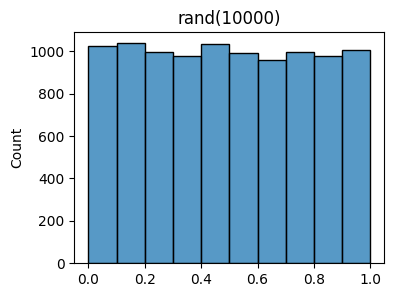

In [8]:
x = np.random.rand(10000)
plot_histogram(x, title=f'rand({10000})', bins=10)

It should be increasingly clear now that what's going on is that rand is sampling numbers between 0 and 1 with equal probability. Each bin should contain roughly $\frac{10000}{10}=1000$ counts, since there are $10000$ samples and $10$ bins. Said differently, the *values* in each bin should have a $\frac{1}{10}=0.1$ probability of being sampled. For example, the values in the left-most bin, call it $\text{bin}_0 = [0, 0.1]$ should have

$$\mathbb{Pr}(x \in \text{bin}_0) = \mathbb{Pr}(0 \leq x \leq 0.1) = 0.1.$$

This type of "flat", equal probability sampling is called **uniform sampling**.

You may be questioning that it's indeed the case that each bin is truly getting sampled as much as the other bins. After all, the plot still clearly shows their heights vary a bit. Some bins have slightly more values than others do. We can look at how many counts are in the bin using `np.histogram`, which also defaults to $10$ bins. You can see some bins have as many as $1037$ values, some as few as $960$ values.

In [9]:
bin_counts, _ = np.histogram(x)
bin_counts

array([1024, 1037,  994,  979, 1035,  992,  960,  998,  976, 1005])

This variation in the bin counts is really due to the fact that we're only sampling a finite number of values. To get *true* uniform sampling, where all bins have the same counts, we'd have to sample an infinitely large number of times.

Here's a rule of thumb for how much the bin counts should be expected to fluctuate as a function of the sample size. If $n$ is the sample size, and bin $k$ contains $n_k$ counts (i.e. its bar height is $n_k$), then you can expect the counts to fluctuate by about

$$n_k \pm \sigma_k = n_k \pm \sqrt{n_k\bigg(1 - \frac{n_k}{n}\bigg)}.$$

Read this expression as, "the counts center around $n_k$, but can vary by roughly $\pm \sigma_k$ in either direction". This notation is a common way to express how an estimate can fluctuate. We'll see where this rule comes from later.

In the above example, there are $n=10000$ samples, and each bin has about $n_k=1000$ counts, so you should expect the counts to fluctuate by about

$$n_k \pm \sigma_k = 1000 \pm \sqrt{1000\bigg(1 - \frac{1000}{10000}\bigg)} = 1000 \pm 30,$$

which is clearly in line with what we're seeing. Notice as the sample size $n \rightarrow \infty$, the count fluctuations $\sigma_k \rightarrow 0$.

Back to random variables. Broadly speaking we can divide random variables into two classes of distributions:
- discrete distributions: random variables that can only take on a discrete set of values.
- continuous distributions: random variables that can take on any continuum of real values.

I'll start by talking about the discrete case since it's easier to understand.

## Discrete Probability

### Motivation: Rolling a Die

Consider a very simple toy problem: rolling a die (singular of dice). If you've never seen dice before, they're white cubes with black dots on each face of the cube. Each face gets some number of black dots on it between 1 and 6. People like to "roll" these dice in games by shaking and tossing them onto the ground. The person with the highest score, i.e. the sum of the number of dots facing upward, wins that round.

<br><center><span style="font-size: 80px;">&#127922;</span></center><br>

Let's think a little bit about a single die. Suppose I want to roll a single die. Having not thrown the die yet, what should I "expect" my score to be? The possible scores I can have are just the number of dots on each face of the die, i.e. $x=1,2,3,4,5,6$. This alone doesn't tell me what the chance is that any given $x$ turns up in a roll. We need some other information.

Perhaps your common sense kicks in and you think, "Well clearly each number has an equal chance of showing up if you roll the die". This is called the **principle of indifference**. In practice you'd usually be right. You're saying that, since we don't have any other information to go on, each number should have an equal chance of showing up on each roll. That is, on any given roll, the random variable $x$ should take on each value $x_k=1,2,\cdots,6$ with probability,

$$\mathbb{Pr}(x=x_k) = \frac{1}{6}.$$

Denote these probabilities as $p_k$ for short, so $p_k = \mathbb{Pr}(x=x_k)$. Observe,
1. Each probability is non-negative, $p_k = \frac{1}{6} \geq 0$,
2. The sum of all probabilities is one, $\sum_{k=0}^5 p_k = 6 \cdot \frac{1}{6} = 1$.

These two properties are the defining characteristics of a probability. After all, we *defined* probability as a function $0 \leq \mathbb{Pr}(x) \leq 1$. The second condition is just a mathematical way of saying that rolling the die must return *some* value between $1$ and $6$. It can't just make up some new value, or refuse to answer.

Anyway, suppose I rolled the die $36$ times and got the following values:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 3 | 4 | 5 | 4 | 3 | 1 | 3 | 6 | 5 | 2 | 1 | 5 | 4 | 2 | 1 | 1 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 3 | 3 | 6 | 6 | 1 | 5 | 4 | 2 | 2 | 4 | 6 | 2 | 4 |

We can make a histogram out of these and check the principle of indifference by verifying the bins are all of about the same height (at least as close to the same as only 30 rolls will allow). Note that I'm now using `is_discrete=True` here, which tells the helper function to use a slightly different plot `sns.countplot`, which makes nicer histograms for discrete data like this.

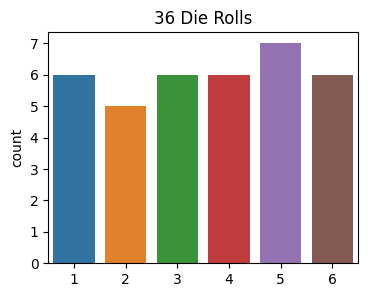

In [10]:
x = [3, 4, 5, 4, 3, 1, 3, 6, 5, 2, 1, 5, 4, 2, 1, 1, 1, 6, 5, 6, 3, 5, 5, 3, 3, 6, 6, 1, 5, 4, 2, 2, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls')

Given the fact that I only rolled $36$ times, this histogram looks very uniform, giving a pretty strong hint that each value has an equal probability of being rolled. Since most bars have height $6$, they correspond to probabilities of $\frac{6}{36}=\frac{1}{6}$, which is what our common sense expected. Note the counts can fluctuate in this case in a range of about $6 \pm 2$. This is an example of a *fair die*.

What if our common sense was incorrect? What if I rolled the die a bunch of times and found out some numbers occurred a lot more often than others? This would happen if the die were weighted unevenly, or *loaded*. In this case we're left to assign some *weight* $n_k$ to each number $x_k$.

To determine what the right weights should be empirically, probably the easiest way would again be to roll the die a bunch of times and count how many times each value $x_k$ occurs. Those counts will be your weights $n_k$. These are just the heights of each bin in the histogram. To turn them into probabilities $p_k$, divide by the total number of rolls, call it $n$. The probabilities would then be given approximately by

$$p_k = \mathbb{Pr}(x=x_k) \approx \frac{n_k}{n}.$$

As $n \rightarrow \infty$ this equality goes from approximate to exact. Another way of saying this is that we could *define* the probability $\mathbb{Pr}(x=x_k)$ as the limit

$$\mathbb{Pr}(x=x_k) = \lim_{n \rightarrow \infty} \frac{n_k}{n}.$$

This is an alternate way of defining a probability, different from the "degree of belief" approach I used above. This is usually called the **frequentist** or objective approach. In this approach, probability is the frequency of the number of times an outcome occurs in an experiment, i.e. $\frac{n_k}{n}$. In contrast, the "degree of belief" perspective is called the **Bayesian** or subjective approach. Both approaches have their uses, so we'll go back and forth between the two as it suits us.

To test if your die is loaded, what you can do is roll the die $n$ trials and calculate the probabilities. If they're all roughly equal to $1/6$ like the example above then the die is fair. Otherwise it's loaded. Suppose when I'd rolled the die I'd instead gotten the following outcomes:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 4 | 4 | 5 | 4 | 3 | 5 | 3 | 6 | 5 | 6 | 1 | 5 | 4 | 5 | 6 | 5 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 4 | 3 | 6 | 6 | 4 | 5 | 4 | 2 | 5 | 4 | 6 | 2 | 4 |

Let's plot the histogram of these outcomes and compare to the fair die case.

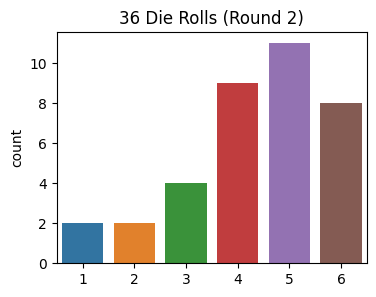

In [11]:
x = [4, 4, 5, 4, 3, 5, 3, 6, 5, 6, 1, 5, 4, 5, 6, 5, 1, 6, 5, 6, 3, 5, 5, 4, 3, 6, 6, 4, 5, 4, 2, 5, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls (Round 2)')

Notice how now the outcomes are skewed towards higher values. This clearly doesn't look uniform anymore since most of the counts aren't in the expected range of $6 \pm 2$. The die has been "loaded to roll high". 

Using the frequentist approach we can estimate what the probability of rolling each value is. To do that, we can get each of the bin counts and divide them all by $n=36$. The probabilities are given below. Notice they sum to one, like you'd expect.

In [12]:
counts, _ = np.histogram(x, bins=6)
n = len(x)
p = counts / n
[f"Pr(x={i+1}) = {round(p[i], 3)}" for i in range(len(p))]

['Pr(x=1) = 0.056',
 'Pr(x=2) = 0.056',
 'Pr(x=3) = 0.111',
 'Pr(x=4) = 0.25',
 'Pr(x=5) = 0.306',
 'Pr(x=6) = 0.222']

### General Case

Of course, there's nothing special about a die. We can define probabilities in exactly the same way for any discrete random variable. A random variable $x$ is called **discrete** if it can take on one of $k$ countable values $x_0,x_1,\cdots,x_{k-1}$. Suppose we run an experiment $n$ times and observe the outcomes of $x$ at each trial. If $x=x_j$ for some number of counts $n_j$, then the probability $x=x_j$ is given by the limit of running the experiment infinitely many times,

$$p_j = \mathbb{Pr}(x=x_j) = \lim_{n \rightarrow \infty} \frac{n_j}{n}.$$

The set of values that $x$ can take on are called the **support** of the random variable. For values outside the support, it's assumed the probability is zero. As will always be true with probabilities, it's still the case that each probability must be non-negative, and they must all sum to one,

$$p_j \geq 0, \quad \sum_{j=0}^{k-1} p_j = 1.$$

While we have an experimental way to calculate probabilities now, it would be useful to define probabilities as functions of random variables so we can study them mathematically. These functions are called **probability distributions**. Suppose $p_j = p(x_j)$ for some function $p(x)$. We say $x$ is distributed as $p(x)$, written in short-hand as $x \sim p(x)$. If $x$ is discrete, we call the function $p(x)$ a **probability mass function**, or **PMF** for short.

In the simple case of the fair die, since each $p_j = \frac{1}{6}$, its PMF is just the simple constant function $p(x) = \frac{1}{6}$. This distribution is an example of the **discrete uniform distribution**. If $x$ is a discrete random variable taking on one of $k$ outcomes, and $x$ is distributed as discrete uniform, then its probabilities are given by $p_j = \frac{1}{k}$ for all $j$. In histogram language, all bins have approximately the same number of counts.

In the less simple case of the loaded die we had to estimate each probability empirically. Supposing we could calculate those probabilities exactly, the PMF for that particular loaded die would look like

$$
p(x) = 
\begin{cases}
0.056, & x = 1, \\
0.056, & x = 2, \\
0.111, & x = 3, \\
0.250, & x = 4, \\
0.306, & x = 5, \\
0.220, & x = 6.
\end{cases}
$$

This is an example of a **categorical distribution**. Their histograms can look completely arbitrary. Each bin can contain as many counts as it likes. All that matters is that $k$ is finite and all the probabilities sum to one. Any time you take a discrete uniform random variable and weigh the outcomes (e.g. by loading a die) you'll create a categorical distribution.

Typically each distribution will have one or more parameters $\theta$ that can be adjusted to change the shape or support of the distribution. Instead of writing $p(x)$ for the PMF, when we want to be explicit about the parameters we'll sometimes write $p(x; \theta)$. The semi-colon is used to say that any arguments listed after it are understood to be parameters, not function inputs. In this notation, parameters of a distribution are assumed to be known, non-random values. We'll relax this requirement below, but assume parameters are non-random for now.

For example, the discrete uniform distribution has two parameters indicating the lowest and highest values in the support, called $a$ and $b$. We could thus express its PMF as $p(x;a,b)$, which means "the probability of $x$ given *known* parameters $a$ and $b$".

Using these parameters, it's also common to use special symbols as a short-hand for common distributions. For example, the discrete uniform distribution with parameters $a$ and $b$ is often shortened to something like $DU(a,b)$. If we want to say $x$ is a discrete uniform random variable, we'd write $x \sim DU(a,b)$. You'll also sometimes see people use the symbol to write the PMF as well, for example $DU(x;a,b)$.

### Discrete Distributions

Some discrete probability distributions occur so frequently that they get a special name. Each one tends to occur when modeling certain kinds of phenomena. Here are a few of the most common discrete distributions. I'll just state them and summarize their properties for future reference.

#### Discrete Uniform Distribution
- Symbol: $DU(a,b)$
- Parameters: Integers $a, b$ with $a < b$
- Support: $x=a,a+1,\cdots,b-1$
- PMF: $$p(x; a,b) = \frac{1}{b-a}, \ \text{ for } x = a, a+1, \cdots, b-1.$$
- Examples: The fair die, taking $a=1, b=7$ gives $x \sim D(1,7)$ with $p(x) = \frac{1}{7-1} = \frac{1}{6}$.
- Used to model: Discrete processes that occur with equal weight, or are suspected to (the principle of indifference)
- Sampling function: `np.random.randint(a, b)`

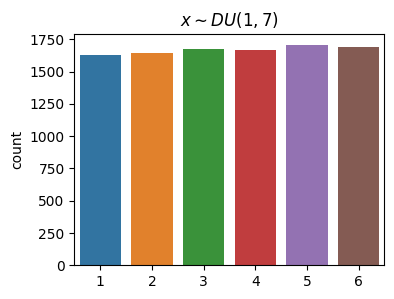

In [13]:
a = 1
b = 7
x = np.random.randint(a, b, size=10000)
plot_histogram(x, is_discrete=True, title=f'$x \sim DU({a},{b})$')

#### Bernoulli Distribution

- Symbol: $\text{Ber}(\text{p})$
- Parameters: $0 \leq \text{p} \leq 1$
- Support: $x=0,1$
- PMF:
$$
p(x; \text{p}) = \text{p}^x (1-\text{p})^{1-x} = 
\begin{cases}
1-\text{p} & x = 0, \\
\text{p} & x = 1.
\end{cases}
$$
- Examples: 
    - Flipping a fair coin, where $\text{tails} = 0$, $\text{heads} = 1$, and $\text{p}=\frac{1}{2}$, gives $x \sim \text{Ber}\big(\frac{1}{2}\big)$.
    - Binary classification. Given a sample $\mathbf{x}$ with some binary output $y=0,1$. If $\text{p}=\hat y$, then $y|\mathbf{x} \sim \text{Ber}(\hat y)$.
- Used to model: Any binary process where the probability of success can be estimated
- Sampling function: `np.random.choice([0, 1], p=[1 - p, p])`

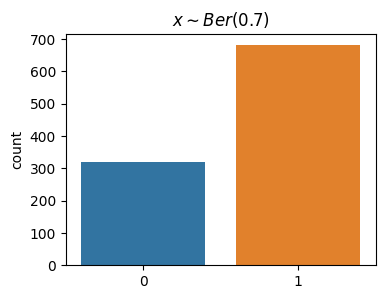

In [14]:
p = 0.7
x = np.random.choice([0, 1], p=[1 - p, p], size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Ber({p})$')

#### Categorical Distribution

- Symbol: $\text{Cat}(\mathbf{p})$
- Parameters: $k$ non-negative real numbers $\mathbf{p}=(p_0,p_1,\cdots,p_{k-1})$ that sum to one
- Support: $x = 0, 1, \cdots, k-1$
- PMF:
$$
p(x; \mathbf{p}) = \begin{cases}
p_0 & x = 0, \\
p_1 & x = 1, \\
\cdots & \\
p_{k-1} & x = k-1.
\end{cases}
$$
- Examples: 
    - A loaded die, where $k=6$ and each face $j$ rolls with probability $p_j$, so $x \sim \text{Cat}(\mathbf{p})$
    - Multiclass classification. Given a sample $\mathbf{x}$ with outputs in one of $k$ classes $y=0,1,\cdots,k-1$. If $\mathbf{p}=\mathbf{\hat y}$, then $\mathbf{y}|\mathbf{x} \sim \text{Cat}(\mathbf{\hat y})$.
- Used to model: Any categorical process where a finite number of classes can occur with arbitrary probabilities
- Sampling function: `np.random.choice(np.arange(k), p=p)`

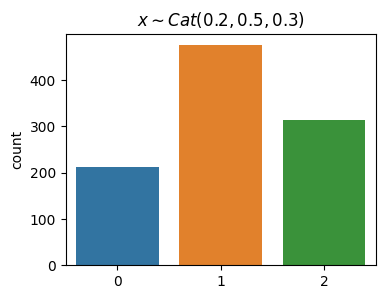

In [15]:
p = [0.2, 0.5, 0.3]
x = np.random.choice(np.arange(len(p)), p=p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Cat{tuple(p)}$')

#### Binomial Distribution

- Symbol: $\text{Bin}(n, \text{p})$
- Parameters: positive integer $n$ and some $0 \leq \text{p} \leq 1$
- Support: $x = 0, 1, \cdots, n$
- PMF:
$$p(x; n,\text{p}) = \binom{n}{x} \text{p}^{x} (1-\text{p})^{n-x}, \ \text{for} \ x=0,1,\cdots,n, \ \text{where} \ \binom{n}{x} = \frac{n!}{x!(n-x)!}.$$
- Examples: 

- Used to model: 
- Sampling function: `np.random.binomial(n, p)`

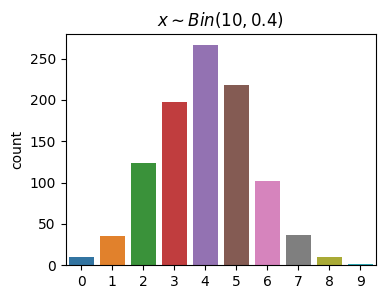

In [19]:
n = 10
p = 0.4
x = np.random.binomial(n, p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Bin{(n,p)}$')

#### Poisson Distribution

- Symbol: $\text{Poisson}(\lambda)$
- Parameters: $\lambda \geq 0$
- Support: $x = 0, 1, 2, 3, \cdots$
- PMF:
$$p(x; \lambda) = \frac{\lambda^x e^{-\lambda}}{x!}, \quad \text{for} \ x=0,1,2,3,\cdots.$$
- Examples: 

- Used to model: 
- Sampling function: `np.random.poisson(lambda)`

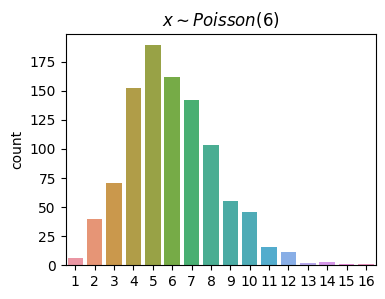

In [20]:
lambda_ = 6
x = np.random.poisson(lambda_, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Poisson({lambda_})$')

## Continuous Probability

### Motivation

**Consider replacing with a different type of measurement, e.g. measuring voltages with a meter. Include error in same table, or at all?**

Discrete probabilities addressed a specific kind of situation, where we had $n$ discrete possible outcomes and wanted to know what the probability was of each one turning up. In machine learning this kind of situation often shows up in classification problems. 

A different type of situation where probabilities come up is in measurement noise. Suppose you're out taking measurements or something. Maybe you're measuring the length of a piece of pipe or something like that. Remembering the old saying, "measure twice, cut once", you decide to be very careful. You bring in 10 people and have each one separately measure the piece of pipe using a somewhat faulty caliper you have that can measure down to 1/100 of an inch. You then compile their 10 measurements into a table like this,

| Person | Measurement |
|--------|-------------|
| John   | 10.10       |
| Mary   | 10.10       |
| Steve  | 10.09       |
| Sarah  | 10.05       |
| Michael| 10.08       |
| Emily  | 10.14       |
| David  | 10.09       |
| Karen  | 10.13       |
| Tom    | 10.11       |
| Jessica| 10.14       |

What should you conclude from this table? You're looking for a single measurement value to use to cut the pipe. What should you do? Your instinct might suggest to take the average of these values, which turns out to be 10.1.

In [ ]:
x = [10.10, 10.10, 10.09, 10.05, 10.08, 10.14, 10.09, 10.13, 10.11, 10.14]
mean = np.mean(x).round(2)
mean

But now you start to wonder why the measurements for each person are so far off. You decide to split the measurements into a new table by adding a new column `Error` that looks at the difference of each measured value from the average you just calculated.

| Person | Measurement | Error |
|--------|-------------|-------|
| John   | 10.10       | 0.00  |
| Mary   | 10.10       | 0.00  |
| Steve  | 10.09       | -0.01 |
| Sarah  | 10.05       | -0.05 |
| Michael| 10.08       | -0.02 |
| Emily  | 10.14       | 0.04  |
| David  | 10.09       | -0.01 |
| Karen  | 10.13       | 0.03  |
| Tom    | 10.11       | 0.01  |
| Jessica| 10.14       | 0.04  |

It seems kind of like the errors might be random, so you look at their histogram and see if they have any kind of pattern. It seems like most results are pretty close to your average of 0.1, but there are a few on either side that are a little further away.

In [ ]:
error = x - mean
error.round(2).tolist()

In [ ]:
plot_histogram(error, title='Measurement Errors', bins=3)

Let's try to model what's going on here. Suppose $x$ is the true value we're trying to measure, a random variable that can take on any real value. Let $x_0$ denote the true value of the measurement. This is what we would measure if we could do so with zero error. Denote the error term by $\varepsilon$. Then we have
$$x = x_0 + \varepsilon.$$
That is, we've managed to split our random variable $x$ up into two pieces, a non-random value $x_0$, and a random error term $\varepsilon$. We can thus just focus on trying to figure out how the error $\varepsilon$ is distributed.

Intuitively, it feels like whatever distribution $\varepsilon$ has, it should be centered around $0$. It should also have a "spread" of about $0.4$ or so in either direction. It should be peaked around $0$ and fall off roughly symmetrically on either side.

But $\varepsilon$ is evidently continuous. It can take on any real value. The stuff we've covered for discrete probabilities doesn't really apply here. It doesn't make too much sense to define a probability of a continuous value as $p_i \approx \frac{n_i}{N}$ since there are an uncountably infinite number of possible $x_i$ for real numbers. 

### Definitions

What we'll want to do instead is count up the number of occurrences inside a bunch of tiny *subintervals*. Suppose $x$ is defined on some continuous interval $a \leq x \leq b$. Let's divide this interval up into $K$ tiny sub-intervals of length $dx$,

$$a_0 = a + 0dx \leq a_1 = a + dx \leq a_2 = a + 2dx \leq \cdots \leq a_{M} = a + Kdx = b.$$

Now let's do as before with the discrete case. Run an experiment $N$ times and count how many times outcomes occur, not for each $x$, but for each *subinterval* $a_k \leq x \leq a_{k+1}$, call it $n_k$. Then we again have,
$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = p_k \approx \frac{n_k}{N},$$

with the equality becoming exact as $N$ gets infinitely large.

For continuous variables we don't usually write it this way. I'll rewrite $n_k$ by factoring out the $dx$ and writing $n_k=n(x)dx$. Then,

$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = \frac{n(x)}{N} dx.$$

One more step. Instead of talking about the ratio of counts $\frac{n(x)}{N}$, it's more preferable to imagine $N$ to be infinitely large and define a **probability density function** (or **PDF**) by
$$p(x) = \frac{n(x)}{N}.$$

Then the probability that $x$ is in the infinitesimally small subinterval $a_k \leq x \leq a_{k+1}$ is just

$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = p(x) dx.$$

For larger, finite intervals like $a \leq x \leq b$, we just sum up all these $p(x) dx$ values over each subinterval. Provided $dx$ is infinitesimal, this sum becomes an integral
$$\mathbb{Pr}(a \leq x \leq b) = \int_a^b p(x) dx.$$

**Remark:** Note that even though we used $p(x)$ as the probability function in the discrete case, it's not *quite* the same thing as the density function $p(x)$ in the continuous case. The continuous equivalent of the probability function is now $p(x) dx$. In fact, the density function now has units. If $dx$ has units of length for example, then $p(x)$ must have units of inverse length, since probabilities must be dimensionless. Other than this subtlety, you won't lose too much by thinking of the discrete probability function and the continuous density function as basically the same thing, which is why $p(x)$ is used for both.

To be a valid density function it's only necessary that $p(x)$ be a positive function, i.e. $p(x) \geq 0$. It's not required that it sum to one. In fact, any given $p(x)$ value can be as large as we like. All that matters is that the *area under the curve* of $p(x)$ is one when summed over all $x$ values in the support $S$ of the distribution,

$$\int_S p(x) dx = \int_{-\infty}^{\infty} p(x) dx = 1.$$

We can thus choose *any* positive weighting function $w(x) \geq 0$ we like as a density function. To turn $w(x)$ into a density function, just divide it by its area $A$ over its support,
$$p(x) = \frac{w(x)}{A} = \frac{w(x)}{\int_{-\infty}^\infty w(x) dx}.$$

In continuous probability, it's common to define probabilities like $\mathbb{Pr}(a \leq x \leq b)$ using a **continuous distribution function** or **CDF**, defined as the integral of the density function,
$$P(x) = \mathbb{Pr}(-\infty \leq x) = \int_{-\infty}^x p(x')dx'.$$

That is, the CDF is the sum of all probabilities from negative infinity up to the point $x$. Using this notation, one can write the probability of any interval as a difference of CDFs evaluated at the endpoints of the interval,

$$\mathbb{Pr}(a \leq x \leq b) = P(b) - P(a).$$

### Common Continuous Distributions

Here are a couple continuous distributions, ones that show up in machine learning often enough that it's worth remembering their names and forms. There are many other common ones that show up in related fields like statistics, but I don't see a need to mention them.

**Uniform Distribution:** $U(a,b)$

The uniform distribution, denoted $U(a,b)$, is defined via two real-valued parameters $a < b$. Its density function is defined on the interval $a \leq x \leq b$, and given by
$$
p(x) = \begin{cases}
\frac{1}{b-a} & \text{for all } a \leq x \leq b, \\
0 & \text{otherwise}.
\end{cases}
$$

As you'd have guessed, the uniform distribution is the continuous equivalent of the discrete uniform distribution, and has pretty much the same properties as its discrete cousin does. The $\frac{1}{b-a}$ is just a normalizing factor that ensures the distribution has unit area, since $(b-a) \cdot \frac{1}{b-a} = 1$.

The shorthand for this distribution is $U(a,b)$. Sampling a value $x$ from the uniform distribution would look like $x \sim U(a,b)$. The special distribution $U(0,1)$, i.e. rand, is called the standard uniform distribution.

Just as in the discrete case, the histogram provides a good approximation for the density function $p(x)$, and becomes more and more exact as $N$ gets large. The only caveat is that histograms won't always be *normalized* to fall between 0 and 1. The shape will still be more or less the same as the density, however.

The special case where $a=0, b=1$ just generates continuous numbers between 0 and 1. This is just rand. To get continuous numbers in other ranges we can just rescale rand. Alternatively, you can just use the numpy function `np.random.uniform` like so. The histogram for the uniform distribution is flat on $a \leq x \leq b$ and zero elsewhere.

In [ ]:
a = -10
b = 10
x = np.random.uniform(a, b, size=10000)
plot_histogram(x, title='Uniform Distribution: $U(a,b)$')

**Aside:** As I just mentioned, the uniform distribution can be implemented just by shifting rand to fall between $a$ and $b$. Here's an implementation.

In [ ]:
def uniform(a, b, size=1):
    x = np.random.rand(size)
    x = (b - a) * x + a
    return x

x = uniform(a, b, size=10); x

**Gaussian Distribution:** $\mathcal{N}(\mu, \sigma^2)$

The Gaussian distribution (or normal distribution), denoted $\mathcal{N}(\mu, \sigma^2)$, is defined with two real parameters $\mu$ and $\sigma^2 \geq 0$ on the entire real line. Its density function is given by
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x - \mu)^2}{2\sigma^2}\bigg)}.$$

This function is the classic **bell curve**. Here's what it looks like in the *standard* case when $\mu=0, \sigma^2=1$. This distribution, written $\mathcal{N}(0,1)$, is called the standard Gaussian distribution.

In [ ]:
x = np.linspace(-5, 5, 100)
y = 1 / np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2)
plot_function(x, y, xlim=(-3, 3), ylim=(0, 0.5), title='Gaussian Density', show_grid=False)

The Gaussian distribution is important for many reasons. One reason is that it's frequently a good model for measurement error, like the example I gave above. In fact, I generated the measurement data we saw using parameters $\mu=10.1, \sigma^2 = 0.4^2$.

The CDF of the Gaussian sometimes shows up as well in calculations. It doesn't have a closed form. The standard form CDF is so common we use a special symbol $\Phi(x)$ for it,

$$\Phi(x) = P(x) = \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{\bigg(-\frac{1}{2}x'^2\bigg)} dx'.$$

Here's what the CDF $\Phi(x)$ looks like. Even though we can't explicitly write down its functional form, we can use the `scipy.stats` function `norm.cdf` to get it for us. Notice the curve is monotonically increasing from 0 to 1 over the real line. It looks basically like a sigmoid function. This is more or less what CDFs look like in general, except they may be scaled differently.

In [ ]:
from scipy.stats import norm

x = np.linspace(-3, 3, num=100)
cdf = norm.cdf(x)

plot_function(x, cdf, xlim=(-3, 3), ylim=(0, 1), title='Standard Gaussian CDF $\Phi(x)$', show_grid=False)

But what do the parameters $\mu$ and $\sigma^2$ actually do here? If you stare at the density function, you'll see it peaks when the exponent is zero, i.e. when $x=\mu$. Evidently, $\mu$ describes the center or peak of the distribution. It's called the **mean**. What about $\sigma^2$? Ignore the constant out front and just stare at the exponential again. Notice $\sigma^2$ is in the denominator of the exponent. As $\sigma^2$ gets bigger the exponent gets smaller, hence the curve gets flatter. And as $\sigma^2$ gets smaller the exponent gets larger, hence the curve gets sharper. It's called the **variance**. We'll talk more about the mean and variance soon. We can define them for any almost smooth distribution, continuous or discrete.

To sample from a Gaussian distribution we can use `np.random.normal(mu, sigma)`. Unfortunately this function takes the square root of the variance $\sqrt{\sigma^2}=\sigma$ as a parameter, not the variance $\sigma^2$ itself. Try not to get this mixed up. Note we can also sample from the *standard* Gaussian $\mathcal{N}(0,1)$ using the simpler function `np.random.randn`.

In [ ]:
mu = 10.1
sigma = 0.4
x = np.random.normal(mu, sigma, size=1000)
plot_histogram(x, title='Gaussian Distribution: $\mathcal{N}(\mu, \sigma^2)$')

**Aside:** Just like every other distribution we've seen so far, we can again implement it from scratch just from using rand. While the function is easy to write down, why it works is a bit harder to describe. It uses what's called the [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform). If we sample two variables $u_1,u_2$ from rand, i.e. $u_1, u_2 \sim \mathcal{U}(0,1)$, it turns out the random variable
$$z = \sqrt{-2 \log(u_1)} \cos(2 \pi u_2)$$
is distributed as $\mathcal{N}(0, 1)$. To get an arbitrary Gaussian we can just apply the shift-and-scale transformation $x = \sigma z + \mu$ to get a $\mathcal{N}(\mu, \sigma^2)$ value.

In [ ]:
def normal(mu=0, sigma=1, size=1):
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    x = z * sigma + mu
    return x

x = normal(0, 1, size=10); x

**Laplace Distribution:** $\text{Laplace}(\mu, \sigma)$

The Laplace distribution, denoted $\text{Laplace}(\mu, \sigma)$, is very similar to the Gaussian distribution. It has a "shift" parameter $\mu$ and a "scale" parameter $\sigma$, and is defined on the whole real line by the density function
$$p(x) = \frac{1}{2\sigma} \exp\bigg(-\frac{|x-\mu|}{\sigma}\bigg).$$

Notice how similar this density looks to the Gaussian density. The shift parameter $\mu$ again acts to center the distribution, as well as its mean. The scale parameter $\sigma$ again acts as a sort of measure of the "spread" of the distribution, but its square isn't exactly the variance (it's half the variance). The main difference to notice is that we're looking at the *absolute* difference $|x-\mu|$ instead of the *mean square* difference $(x-\mu)^2$.

This difference makes the behavior of the curve look somewhat different at the peak and the tails of the distribution. At the peak $x=\mu$, instead of having a smooth bell shape, the Laplace density has a sharp peak. The tails on both sides also fall of somewhat slower than the Gaussian does, which makes it more likely it'll sample points further away from the center.

In python, we can sample from the Laplace distribution using `np.random.laplace(mu, sigma)`. Here's a plot of the density function along with the mirroring histogram. Notice that how sharply peaked things are around the center. Also note how fat the tails are on each end, and how much more likely it is that "larger" values get sampled compared to the Gaussian.

In [ ]:
x = np.linspace(-3, 3, 100)
y = 1 / (2 * np.pi) * np.exp(-np.abs(x))
plot_function(x, y, xlim=(-3, 3), ylim=(0, 0.3), title='Laplace Density', show_grid=False)

In [ ]:
mu = 10.1
sigma = 0.4
x = np.random.laplace(mu, sigma, size=1000)
plot_histogram(x, title='Laplace Distribution: $L(\mu, \sigma)$')

**Aside:** We can implement a Laplace random number generator similar to how we did with the Gaussian generator, by sampling from rand and applying some kind of transformation to the output. In the case of Laplace, if $u$ is sampled from rand, the right transformation turns out to be
$$x = \mu - \sigma \text{ sign}\big(u-1/2\big) \log\big(1 - 2\big|u-1/2\big|\big), \qquad \text{where } u \sim U(0,1).$$
The sign function $\text{sign}(u-1/2)$ is defined to be $+1$ if $u > 1/2$, and $-1$ otherwise.
This transformation turns out to be the inverse CDF of the Laplace distribution, i.e. if $u=P(x)$, then $x=P^{-1}(u)$. Inverse CDFs, provided they can be solved for, are one popular method for sampling from arbitrary distributions like this.

In [ ]:
def laplace(mu, sigma, size=1):
    u = np.random.rand(size)
    x = mu - sigma * np.sign(u - 0.5) * np.log(1 - 2 * np.abs(u - 0.5))
    return x

x = laplace(mu=0, sigma=1, size=10); x

## Multivariate Distributions

### Definitions

Just as univariate function extend naturally to multivariate functions, the same is true of probabilities. We can naturally have probability functions of multiple random variables. For example, if $x,y$ are two random variables, then we can define their **joint distribution** via the probability (or density) function $p(x,y)$. For discrete variables, you can think of $p(x,y)$ as the number of times the combination $x_i,x_j$ both appear in an experiment, call it $n_{k,l}$. If we run $N$ total experiments, then

$$p(x_k,x_l) = p_{k,l} \approx \frac{n_{k,l}}{N},$$

where again the equality becomes exact as $N$ becomes infinitely large. The case for continuous distributions is defined similarly, except we consider counts inside $N$ tiny rectangular intervals 
$$a_k \leq x \leq a_{k+1}, \\ b_l \leq y \leq b_{l+1}.$$

If we have two random variables $x,y$, we can put them together to create a **random vector** $\mathbf{x}=(x,y)$, in which case we can also think of the joint distribution as a probability over vectors $p(\mathbf{x})$.

A very important notion to consider when it comes to joint distributions is the idea of statistical independence. Essentially, if two random variables $x$ and $y$ don't affect each other at all we can factor the joint distribution into a product of univariate distributions $p(x)$ and $p(y)$, each on its own variable acting alone. Inspired by this idea, we *define* two random variables $x$ and $y$ to be **independent** if

$$p(x,y) = p(x) \cdot p(y).$$

The univariate distributions $p(x)$ and $p(y)$ are usually called the **marginal distributions**. They're what you'd get if you summed out (or "marginalized out") the effect of the other variable.

Independence is so important that it's good to get an intuitive feel for when two random variables might be independent of each other. One classic example is flipping two coins in a row. Let $x=H,T$ be the value from flipping the first coin, and $y=H,T$ the value from flipping the second coin. Assuming both coins are fair, the probability of each individually being heads, i.e. $x=y=1$, is $p_x=p_y=\frac{1}{2}$. But what is the probability that *both* turn up heads? In that case the possible outcomes are $(x,y) = HH, HT, TH, TT$. By counting we can see that the probability of both being heads must then be $p_{x,y}=\frac{1}{4}$. Now, notice that this is just
$$p(x,y) = p(x) \cdot p(y) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}.$$

You can verify this is true for all possible combinations of heads and tails. That is, $x$ and $y$ are independent.

All of these definitions and ideas extend readily to $n$ random variables as well. We can have joint distributions of the form $p(x_0,x_1,\cdots,x_{n-1})$, random vectors of the form $\mathbf{x} = (x_0,x_1,\cdots,x_{n-1})$, and so own. We say that $x_0,x_1,\cdots,x_{n-1}$ are independent if we can factor the joint distribution into a product of marginal distributions,
$$p(x_0,x_1,\cdots,x_{n-1}) = p(x_0)p(x_1) \cdots p(x_{n-1}).$$

The special case where all random variables $x_0,x_1,\cdots,x_{n-1}$ are *both* independent *and* come from the same distribution is special. We call these random variables **independent identically distributed** or **IID**. Not only do the joint distributions factor, but they all factor into probability functions with the same functional form. When we want to sample $x_0,x_1,\cdots,x_{n-1}$ IID from a marginal distribution $p(x)$, we'll sometimes use the shorthand
$$x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} p(x),$$
or even more lazily just write $\mathbf{x} \overset{iid}{\sim} p(x)$.

### Application: Bernoulli Trials

An interesting application of the use of IID properties of distributions is the sum of IID Bernoulli random variables. Suppose $x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} \text{Ber}(p_0)$. Let's consider a new (univariate) random variable gotten by summing up all these IID Bernoulli ones,

$$x = \sum_{j=0}^{n-1} x_j = x_0 + x_1 + \cdots x_{n-1}.$$

Let's try to think a bit about what this new random variable's properties are. First, notice since each $x_j=0,1$, the support of $x$ must be $x = 0, 1, \cdots, n$. Next, since the $x_j$ are all IID, the joint distribution $p(x_0,x_1,\cdots,x_{n-1})$ factors,

$$
\begin{align}
p(x_0,x_1,\cdots,x_{n-1}) &= p(x_0)p(x_1) \cdots p(x_{n-1}) \\
&= p_0^{x_0}(1-p_0)^{1-x_0} p_0^{x_1}(1-p_0)^{1-x_1} \cdots p_0^{x_{n-1}}(1-p_0)^{1-x_{n-1}} \\
&= p_0^{x_0+x_1+\cdots+x_{n-1}} (1-p_0)^{n-(x_0+x_1+\cdots+x_{n-1})} \\
&= p_0^{x} (1-p_0)^{n-x}.
\end{align}
$$

Notice the bottom right term is a function of $x$ alone. This suggests a way to define a probability function for our binomial random variable $x$. Perhaps we could just *define* $p(x)=p(x_0,x_1,\cdots,x_{n-1})$. This almost works, but not quite. The reason is that, while the *order* of terms in $p(x_0,x_1,\cdots,x_{n-1})$ matters, the order does *not* matter in the sum $x=x_0+x_1+\cdots+x_{n-1}$. We thus need to make the probability function order invariant by essentially considering the joint distributions for all possible orders of $x_0,x_1,\cdots,x_{n-1}$ such that $x=x_0+x_1+\cdots+x_{n-1}$.

Believe it or not this is easy though. We just need to multiply each $p_0^{x} (1-p_0)^{n-x}$ by the number of ways $x$ numbers can be sampled from a bin of $n$ numbers, assuming their order doesn't matter. If you're not familiar with this term I'll just tell you. It's called the binomial coefficient, usually denoted

$$\binom{n}{x} = \frac{n!}{x!(n-x)!},$$

where $j! = j(j-1)(j-2) \cdots 1$ for $j>0$ and $0! = 1$.

Using this coefficient, we can now define the probability function for this distribution as

$$
p(x) = \begin{cases}
\binom{n}{x} p_0^{x} (1-p_0)^{n-x}  & \text{for all } x=0,1,\cdots,n, \\
0 & \text{otherwise}.
\end{cases}
$$

This distribution is called the **binomial distribution**, sometimes denoted $\text{Bin}(n,p_0)$. In applications, the binomial distribution shows up anytime you're interested in how many binary-valued events might occur. The classic example is flipping $n$ coins and counting the number of heads. The number of heads can be modeled by a binomial distribution, assuming the number of coins $n$ is fixed.

One even more curious fact is that the binomial distribution *looks like* a Gaussian distribution when $n$ is large and $p_0$ isn't too close to 0 or 1. This is a consequence of the Central Limit Theorem, which I'll discuss in the next lesson. I'll show a quick example of this fact below by sampling from a binomial distribution using `np.random.binomial(n, p)` and then plotting its histogram. Notice how bell-shaped the curve looks.

In [ ]:
n = 100
p = 0.5
x = np.random.binomial(n, p, size=1000)
plot_histogram(x, title='Binomial Distribution: Bin$(n,p)$')

### Multivariate Distributions

All of the common distributions we've covered so far can be extended into the multivariate case. The most useful multivariate extensions for machine learning purposes is the multivariate Gaussian distribution.

**Multivariate Gaussian Distribution:** $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

The multivariate Gaussian distribution, denoted by the symbol $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, is defined on all of $n$ dimensional space $\mathbb{R}^n$ with density function

$$p(\mathbf{x}) = (2 \pi)^{-n/2} |\boldsymbol{\Sigma}|^{-1/2} \exp\bigg(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\bigg),$$

where $\boldsymbol{\mu} \in \mathbb{R}^n$ is an n-dimensional real vector and $\boldsymbol{\Sigma} \in \mathbb{R}^{n \times n}$ is a positive square matrix. The vector $\boldsymbol{\mu}$ is the $n$ dimensional generalization of the mean, which is just a vector of means. The mean of variable $x_i$ is $\mu_i$ for all $i=0,\cdots,n-1$. The matrix $\boldsymbol{\Sigma}$ is called the **covariance matrix**. It's a symmetric, positive matrix that generalizes the notion of variance to $n$ dimensions. Why a matrix? Because each $x_i,x_j$ can have a notion of (co)variance with each other. More on this soon.

Notice the special symbol $|\boldsymbol{\Sigma}|$ in the constant term outside the exponential. It's not important to know what this is. Just consider it a function of $\boldsymbol{\Sigma}$ alone. If you must know, it's the *determinant* of the matrix. The only thing worth knowing is when $\boldsymbol{\Sigma}$ is diagonal, $|\boldsymbol{\Sigma}|$ is the product of the diagonal elements, which I'll use below.

Note the exponent term is really just a sum of a bunch of scalar terms when expanded out,
$$(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} (x_i - \mu_i) \cdot \Sigma_{i,j}^{-1} \cdot (x_j - \mu_j),$$
hence the exponent is really just the sum of a bunch of quadratic terms, reminiscent of the univariate Gaussian.

In the special case when the covariance matrix $\boldsymbol{\Sigma}$ is diagonal, we say the random variables $x_0,x_1,\cdots,x_{n-1}$ are **uncorrelated**. Suppose
$$\boldsymbol{\Sigma} = \text{diag}(\sigma_0^2, \sigma_2^2, \cdots, \sigma_{n-1}^2).$$
You can pretty easily verify that its inverse is simply the reciprocals of the diagonal terms,
$$\boldsymbol{\Sigma}^{-1} = \text{diag}\bigg(\frac{1}{\sigma_0^2}, \frac{1}{\sigma_1^2}, \cdots, \frac{1}{\sigma_{n-1}^2}\bigg).$$
This makes the complicated looking exponent term reduce to a simple sum of squares. Using the fact $|\boldsymbol{\Sigma}|=\sigma_0\sigma_1\cdots\sigma_{n-1}$ as well, we get

$$
\begin{align}
p(\mathbf{x}) &= \frac{1}{\sqrt{2 \pi \sigma_0 \sigma_1 \cdots \sigma_{n-1}}} \exp\bigg(-\frac{1}{2} \sum_{i=0}^{n-1} \frac{(x_i - \mu_i)^2}{\sigma_i^2} \bigg) \\
&= \Bigg(\frac{1}{\sqrt{2 \pi \sigma_0^2}} \exp{\bigg(-\frac{(x_0 - \mu_0)^2}{2\sigma_0^2}\bigg)} \Bigg) \cdots \Bigg(\frac{1}{\sqrt{2 \pi \sigma_{n-1}^2}} \exp{\bigg(-\frac{(x_{n-1} - \mu_{n-1})^2}{2\sigma_{n-1}^2}\bigg)} \Bigg) \\
&= p(x_0) p(x_1) \cdots p(x_{n-1}).
\end{align}
$$

That is, the joint distribution $p(\mathbf{x})$ factors into a product of marginal Gaussian distributions $p(x_0) p(x_1) \cdots p(x_{n-1})$. This means that the variables $x_0,x_1,\cdots,x_{n-1}$ must be independent if they're uncorrelated. In the further special case where $\mu_i=\mu$ and $\sigma_i^2=\sigma^2$ for all $i$, they're also IID.

This distribution is so important to machine learning that it's worth taking some time to visualize it, as a surface in 3D space, as a set of contours, as 3D histogram, and as a heat map. Let's start with the first two. Suppose our random variable $\mathbf{x}=(x,y)$ is 2D. I'm going to plot the surface of the density function $p(x,y)$ as well as the contour plot side-by-side using a helper function `plot_multivariate_normal`. This function will take in the mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ and plot what the distribution looks like for that pair of parameters.

Let's define $\boldsymbol{\mu}=(\mu_x, \mu_y)$ and
$\boldsymbol{\Sigma} = 
\begin{pmatrix}
\sigma_x^2 & \sigma_{x,y} \\
\sigma_{x,y} & \sigma_y^2
\end{pmatrix}.$ A few things to notice:
- Changing $\boldsymbol{\mu}$ just changes where the density is centered. It doesn't change the shape.
- Changing $\sigma_x^2$ or $\sigma_y^2$ changes how much the density spreads in that direction. If they're equal the density will be perfectly circular. If one is greater than the other the density will become elliptical. In the limit one becomes much much greater than the other, the density will essentially just become a univariate Gaussian.
- Making $\sigma_{x,y}$ non-zero makes the density change its angle in the xy-plane. That's what introducing correlation essentially does geometrically. 
- Making $\sigma_{x,y}=0$ means that $x$ and $y$ become independent as I showed above. Geometrically, independence essentially rotates until the density is aligned along the axes themselves.

Feel free to play around with different choices of parameters and see how it affects the densities.

In [ ]:
mu = np.array([0, 0])
Sigma = np.array([[1, 0.5], [0.5, 2]])
plot_multivariate_gaussian(mu, Sigma, elev=10, azim=45)

We can also of course plot the histograms. Suppose we sample a bunch of points $(x,y) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ a bunch of times and plot the histogram. We can do this in python by again using `np.random.randn`, but passing in a shape $(m,n)$ instead of a single number.

When $n=2$ we can plot the histogram in 3D space. I'll plot the standard 2D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{I})$, which has mean zero and identity covariance. It's the multivariate generalization of the standard $\mathcal{N}(0,1)$ Gaussian. I'm using another helper function called `plot_3d_hist` here to hide a lot of ugly code.

In [ ]:
X = np.random.randn(10000, 2)
x, y = X[:, 0], X[:, 1]
plot_3d_hist(x, y, bins=30, xlim=(-2, 2), ylim=(-2, 2), elev=20, azim=30, 
             title='3D Histogram: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')

Finally, we can view the same histogram contour-style using what's called a **heat map**. A heat map is a way of plotting one variable that depends on 2 others, e.g. $p(x,y)$ vs $x$ and $y$. In each grid of the plot the color indicates how "hot" the dependent variable is. The higher the counts in a given bin, the hotter the heat map will look at that bin. We can plot a histogram-style heatmap in matplotlib using `plt.hist2d`. Heat maps are very useful ways of visualizing data like this, usually more so than janky 3D plots like the one above.

In [ ]:
plt.hist2d(x, y, bins=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heat Map: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')
plt.show()

## Conditional Distributions

- Define $y|x$ and $p(y|x)$
- If $x$ takes on some value, what is the chance of any given $y$
- Define conditional independence
- State law of total probabilities (conditioning over all possible values of $x$)
- Derive Bayes Rule
- Bayesian updating

In [ ]:
# p(x, y) = p(y|x) p(x)
# p(x) = p(x|y=0) p(y=0) + p(x|y=1) p(y=1)